## Python

* Great for prototyping, scripting, has a lot of useful libraries
* Not suitable for low-level programming, but OK if the computation can be vectorized (Numpy)
* Great for visualizing results (Matplotlib)

## Jupyter notebooks (http://jupyter.org/)

* Great for presenting Python workflows
* Many useful features (Latex, interactive widgets, etc.) 

## Numpy for common vector/matrix operations
Avoid Python loops; use Numpy functions instead. 

### Example: compare several methods to sum an array
Standard imports:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time

Generate a random N x N array:

In [16]:
N = 3000
A = np.random.normal(size=(N,N)) # an NxN array with random, normally distributed values 
assert A.shape[0] == N and A.shape[1] == N

Consider several methods of suming the array:

In [3]:
# Method 1 - Python loop
t0 = time.time()
sum1 = 0
for n0 in range(N):
    for n1 in range(N):
        sum1 += A[n0, n1]
dt1 = time.time()-t0
print ('Sum:', sum1)
print ('Time of Python loop:', dt1)

# Method 2 - Numpy's sum
t0 = time.time()
sum2 = np.sum(A)
dt2 = time.time()-t0
assert np.abs(sum1-sum2) < 1e-8
print ('Time of Numpy sum  :', dt2)

# Method 3 - sum rows, then resulting column
t0 = time.time()
sum3 = 0
for n0 in range(N):
    sum3 += np.sum(A[n0,:])
dt3 = time.time()-t0
assert np.abs(sum1-sum3) < 1e-8
print ('Time of Method 3   :', dt3)

# Method 4 - sum columns, then resulting row
t0 = time.time()
sum4 = 0
for n1 in range(N):
    sum4 += np.sum(A[:,n1])
dt4 = time.time()-t0
assert np.abs(sum1-sum4) < 1e-8
print ('Time of Method 4   :', dt4)

Sum: -4360.792132683135
Time of Python loop: 2.2598965167999268
Time of Numpy sum  : 0.003542661666870117
Time of Method 3   : 0.01410222053527832
Time of Method 4   : 0.02400350570678711


**Exercise:** why is Method 4 slower than Method 3?

## Cython: accelerating Python code

Some useful tutorials: 
* http://cython.readthedocs.io/en/latest/src/quickstart/build.html
* http://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/running_cython.ipynb
* http://cython.readthedocs.io/en/latest/src/tutorial/numpy.html

In [4]:
%load_ext cython

Write and compile a Cython function for the sum:

In [5]:
%%cython -a
# use "%%cython -a" to see color highlights of slower parts
cimport numpy as np 

cpdef sum_cython(np.ndarray[double, ndim=2] A):
    cdef double sum0 = 0
    cdef int n0, n1, N
    N = A.shape[0]
    for n0 in range(N):
        for n1 in range(N):
            sum0 += A[n0,n1]
    return sum0

unable to execute 'gcc': No such file or directory


CompileError: command 'gcc' failed with exit status 1

Test evaluation time:

In [ ]:
t0 = time.time()
sum5 = sum_cython(A)
dt5 = time.time()-t0
assert np.abs(sum1-sum5) < 1e-8
print ('Time of Cython:', dt5)

Sometimes it is convenient to have inline plots (instead of 'inline' one can in principle use different backends like nbagg, qt, wx or auto) 

In [ ]:
# render plots in the notebook 
%matplotlib inline

## Example: curve fitting by least squares
Let $f(t)=a_0+a_1t+\xi_t$, where $\xi_t\sim\mathcal N(0,\epsilon)$ is a Gaussian white noise.  

#### 1. Creating the data to be fitted

a0 = 1.206519, a1 = -0.371424


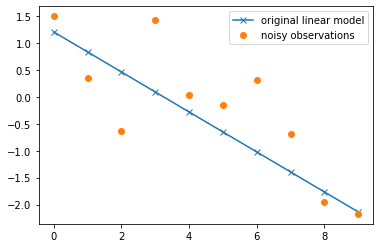

In [6]:
a0 = np.random.normal()
a1 = np.random.normal()
print ('a0 = %f, a1 = %f' %(a0, a1))
N = 10 # number of observations
x = np.arange(0,N)
epsilon = 1e-4
xi = np.random.normal(size=(N,))
y = a0+a1*x
y_noisy = y+xi

plt.figure()
plt.plot(y, '-x', label='original linear model')
plt.plot(y_noisy, 'o', label='noisy observations')
plt.legend(loc='best')
plt.show()

#### 2. Fitting the model to the data
Let us fit a straight line to the observations by least squares:
$$\|F{\mathbf a}-\mathbf{y}\|^2\to\min_{\mathbf a},$$
where 
$$F = 
\begin{pmatrix}
1 & t_1\\
\vdots & \vdots \\
1 & t_N
\end{pmatrix},
\mathbf a =
\begin{pmatrix}
a_0\\
a_1
\end{pmatrix},
\mathbf y = 
\begin{pmatrix}
y_1\\
\vdots \\
y_N
\end{pmatrix},
\|\mathbf v\|^2=\sum_n v_n^2. $$ 

Many ways to solve this problem with Python:

**Approach 1:** Exact solution $\mathbf a = (F^tF)^{-1}F\mathbf y.$

**Approach 2:** Numerical optimization.

**Approach 3:** Numpy library function for least squares. 

Approach 1: a0 = 1.247458, a1 = -0.321539
Approach 2: a0 = 1.247458, a1 = -0.321539
Approach 3: a0 = 1.247458, a1 = -0.321539


/home/alexh3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


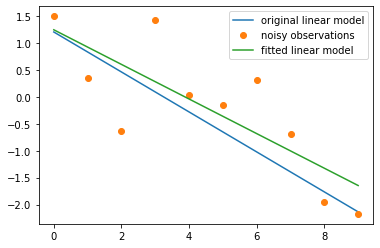

In [7]:
F = np.ones((N,2))
F[:,1] = x

# Approach 1
aa1 = np.dot(np.dot(np.linalg.inv(np.dot(F.T, F)), F.T), y_noisy)
print ('Approach 1: a0 = %f, a1 = %f' %(aa1[0], aa1[1]))

# Approach 2
import scipy.optimize 
def f(aa):
    diff = np.dot(F, aa)-y_noisy
    return np.sum(diff*diff)
res = scipy.optimize.minimize(f, x0=[0,0])
aa2 = res['x']
print ('Approach 2: a0 = %f, a1 = %f' %(aa2[0], aa2[1]))

# Approach 3
aa3 = np.linalg.lstsq(F, y_noisy)[0]
print ('Approach 3: a0 = %f, a1 = %f' %(aa3[0], aa3[1]))

plt.figure()
plt.plot(y, '-', label='original linear model')
plt.plot(y_noisy, 'o', label='noisy observations')
plt.plot(np.dot(F, aa1), '-', label='fitted linear model')
plt.legend(loc='best')
plt.show()

**Exercise:** Perform curve fitting with a 2nd degree polynomial.

**Exercise:** Write down the formula describing the shape of the histogram below. (Hint: Wigner's semicircle law.) 

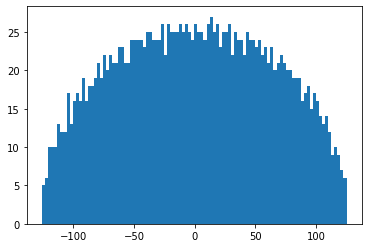

In [8]:
N = 2000
A = np.random.normal(size=(N, N))
B = A+A.T
eigenvalues = np.linalg.eigh(B)[0]

plt.figure()
plt.hist(eigenvalues, bins=100)
plt.show()

## Matplotlib animation

A useful tutorial: https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/

(Disable inline plotting by %matplotlib auto; play with backends or restart the kernel if animation doesn't play.) 

In [20]:
%matplotlib auto
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

Using matplotlib backend: Qt5Agg


### Particles in a box under Lennard-Jones potential

In [10]:
def LJ(r, eps=1., sigma=1.):
    sr = sigma/r
    return 4*eps*(sr**12-sr**6)

N = 100 # number of particles
L = 5. # size of the box
v0std = 2. # initial velocity std per axis per particle

init_pos = 'regular'
if init_pos == 'regular':
    cellsPerSide = int(np.ceil(N**(1./3)))
    L1 = L/cellsPerSide
    x0 = np.zeros((N,3))
    x0[:,0] = np.arange(N)%cellsPerSide     
    a = np.arange(N)//cellsPerSide 
    x0[:,1] = a%cellsPerSide   
    x0[:,2] = a//cellsPerSide    
    x0 = L1/2+L1*x0
                           
elif init_pos == 'random':
    x0 = L*np.random.rand(N,3)
else:
    raise NotImplementedError


v0 = v0std*np.random.normal(size=(N,3))

def F_all(x, eps=1., sigma=1.):
    x1 = np.broadcast_to(x.reshape((N,1,3)), (N,N,3))
    x2 = np.broadcast_to(x.reshape((1,N,3)), (N,N,3))
    R = x2-x1    
    R = (R+L/2.)%L-L/2. # periodic b.c.
    assert np.all(R >= -L/2.) and np.all(R <= L/2.)
    r = np.sqrt(np.sum(R*R, axis=2))
    sr = sigma/r
    F0 = 4*eps*(12*sr**12/r-6*sr**6/r) # scalar values of forces
    F = R*np.broadcast_to((F0/r).reshape((N,N,1)), (N,N,3))
    F[range(N), range(N)] = 0 # exclude self-action
    assert np.sum(np.isnan(F)) == 0
    return -np.sum(F, axis=1)

def integrate(F_all, x, v, dt, N):
    xHistory = [x0] 
    vHistory_ = [v0+dt/2.*F_all(x)]
    for n in range(N):
        xHistory.append(np.remainder(xHistory[-1]+dt*vHistory_[-1], L))
        vHistory_.append(1.*(vHistory_[-1]+dt*F_all(xHistory[-1])))
    vHistory = [(vHistory_[n]+vHistory_[n+1])/2. for n in range(len(vHistory_)-1)]
    assert len(xHistory) == len(vHistory)+1
    return xHistory[1:], vHistory 

m = 2
dt = 10**(-m)
xHistory, vHistory = integrate(F_all, x0, v0, dt=dt, N=int(10./dt)) 
tHistory = dt*np.arange(len(xHistory))

import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib.patches import Rectangle, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d

fig = plt.figure(figsize=(10,10))
ax = p3.Axes3D(fig)

dots, = plt.plot(xHistory[0][:,0], xHistory[0][:,1], xHistory[0][:,2], 'ob') 
  
plt.axis('off')

ax.set_xlim3d([0, L])
ax.set_ylim3d([0, L])
ax.set_zlim3d([0, L])

title = plt.title('')

for zdir in ['x','y','z']:
    for z in [0,L]:
        p = Rectangle((0,0), L, L, color='r', alpha=0.1)
        ax.add_patch(p)
        art3d.pathpatch_2d_to_3d(p, z=z, zdir=zdir)

skip = 1
        
def animate(i): 
    dots.set_data(xHistory[::skip][i][:,0], xHistory[::skip][i][:,1])  
    dots.set_3d_properties(xHistory[::skip][i][:,2])  
    title.set_text("t = %2.3f" %(tHistory[::skip][i]))


ani = animation.FuncAnimation(fig, animate, len(tHistory[::skip]),
    interval=1)

plt.show()

/home/alexh3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/home/alexh3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/home/alexh3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in subtract
/home/alexh3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide


### The heat equation

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

N = 300
dx = 1./N
x0, x1 = np.meshgrid(dx*np.arange(N), dx*np.arange(N))
u0 = np.exp(-70*(4*(x0-0.3)**2+(x1-0.6)**2))+0.5*np.exp(-20*((x0-0.6)**2+(x1-0.4)**2))
dt = 5e-6
a = 1.
uHistory = []
skip = 30
u = u0.copy()
for n in range(3000):
    if n%skip == 0:
        uHistory.append(u.copy())
    
    dudx = np.zeros_like(u)
    dudx[:-1] = u[1:]-u[:-1]
    dudx[-1] = u[0]-u[-1]
    d2udx2 = np.zeros_like(u)
    d2udx2[1:] = dudx[1:]-dudx[:-1]
    d2udx2[0] = dudx[0]-dudx[-1]
    
    dudy = np.zeros_like(u)
    dudy[:,:-1] = u[:,1:]-u[:,:-1]
    dudy[:,-1] = u[:,0]-u[:,-1]
    d2udy2 = np.zeros_like(u)
    d2udy2[:,1:] = dudy[:,1:]-dudy[:,:-1]
    d2udy2[:,0] = dudy[:,0]-dudy[:,-1]
    
    u += a/2.*dt*(1./dx)**2*(d2udx2+d2udy2)

tHistory = dt*skip*np.arange(len(uHistory))
minHistory = [np.min(uHistory[k]) for k in range(len(uHistory))]
maxHistory = [np.max(uHistory[k]) for k in range(len(uHistory))]
meanHistory = [np.mean(uHistory[k]) for k in range(len(uHistory))]
    
fig = plt.figure()
im = plt.imshow(u, vmin=0, vmax=1
                , animated=True)
plt.colorbar()
title = plt.title('')

def animate(i): 
    im.set_array(uHistory[i]) 
    title.set_text("t = %2.5f" %(tHistory[i]))

ani = animation.FuncAnimation(fig, animate, len(uHistory))
plt.show()

### Monte-Carlo simulation of the Ising model 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

L = 100
N = 2**19
beta = 1.
J = 1. #0.44
h = 0

sigma = 2*np.random.randint(0,2,(L,L))-1

sigmaHistory = []
tHistory_ = [int(500*n*(1+2**(n/400.))) for n in range(200)]
nHistory = []

for n in range(N-1):
    k0, k1 = np.random.randint(L), np.random.randint(L) 
    # dH = H_new-H_old
    dH = 2*sigma[k0,k1]*(J*(sigma[k0,(k1-1)%L]+sigma[k0,(k1+1)%L]+sigma[(k0-1)%L,k1]+sigma[(k0+1)%L,k1])+h)
    if dH > 0:
        a = np.random.rand()
        if a > np.exp(-beta*dH):
            continue
    sigma[k0,k1] *= -1
    if n in tHistory_:
        nHistory.append(n)
        sigmaHistory.append(sigma.copy())

fig = plt.figure()
im = plt.imshow(sigma+1, vmin=0, vmax=1, cmap='Greys_r',
                interpolation='none', animated=True)
title = plt.title('')

def animate(i): 
    im.set_array(sigmaHistory[i]) 
    title.set_text('Iteration %d' %(nHistory[i]))

ani = animation.FuncAnimation(fig, animate, len(sigmaHistory))
plt.show()